# **กิตติมา ดารา 650710154**

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/cafethai_prices.csv', parse_dates=['date'], date_format='%d/%m/%Y')
display(df.head())

,date,time,cash_type,coffee_name,money
0,2023-03-01,08:04:19,card,Latte,75
1,2023-03-01,08:08:54,cash,Americano with Milk,70
2,2023-03-01,08:09:03,card,Cappuccino,75
3,2023-03-01,08:10:26,cash,Cappuccino,75
4,2023-03-01,08:15:37,cash,Cappuccino,75


#ให้แต่ละแถวแทน 1 แก้ว

In [6]:
df['cups'] = 1

#ให้แสดงPredic ยอดขายแก้วกาแฟแต่ละชนิดว่ามีกี่แก้วในแต่ละวันที่ขายได้  +1 ต่อแถวแก้วที่ขายได้ ในแต่ละวันของกาแฟล่าสุดทั้ง 8 ชนิด

In [7]:
daily_sales = df.groupby(['date', 'coffee_name'])['cups'].sum().reset_index()
display(daily_sales.head(8))

,date,coffee_name,cups
0,2023-03-01,Americano,19
1,2023-03-01,Americano with Milk,27
2,2023-03-01,Cappuccino,24
3,2023-03-01,Cocoa,7
4,2023-03-01,Cortado,14
5,2023-03-01,Espresso,6
6,2023-03-01,Hot Chocolate,4
7,2023-03-01,Latte,24


#ยอดขายแก้วรวมต่อวันทั้ง 8 ชนิด

In [8]:
daily_totalsales = df.groupby('date')['cups'].sum().reset_index()
daily_totalsales.rename(columns={'cups':'total_cups'}, inplace=True)
display(daily_totalsales.head(10))

,date,total_cups
0,2023-03-01,125
1,2023-03-02,125
2,2023-03-03,127
3,2023-03-04,64
4,2023-03-05,66
5,2023-03-06,128
6,2023-03-07,127
7,2023-03-08,106
8,2023-03-09,105
9,2023-03-10,103


#ลองแสดงยอดขายของ2เดือนล่าสุด วันล่าสุดในข้อมูล ย้อนกลับไป 2 เดือน

In [9]:
end_date = df['date'].max()
start_date = end_date - pd.DateOffset(months=2)

In [10]:
df_2m = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
daily_sales_2m = df_2m.groupby(['date', 'coffee_name'])['cups'].sum().reset_index()
display(daily_sales_2m.head(20))

,date,coffee_name,cups
0,2025-02-28,Americano,16
1,2025-02-28,Americano with Milk,28
2,2025-02-28,Cappuccino,10
3,2025-02-28,Cocoa,7
4,2025-02-28,Cortado,7
5,2025-02-28,Espresso,1
6,2025-02-28,Hot Chocolate,9
7,2025-02-28,Latte,27
8,2025-03-01,Americano,24
9,2025-03-01,Americano with Milk,33


In [11]:
daily_sales_2m.head(20)

,date,coffee_name,cups
0,2025-02-28,Americano,16
1,2025-02-28,Americano with Milk,28
2,2025-02-28,Cappuccino,10
3,2025-02-28,Cocoa,7
4,2025-02-28,Cortado,7
5,2025-02-28,Espresso,1
6,2025-02-28,Hot Chocolate,9
7,2025-02-28,Latte,27
8,2025-03-01,Americano,24
9,2025-03-01,Americano with Milk,33


In [12]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-gyadth1v
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-gyadth1v
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit fcd09fe8b6bf57643bde7847bf42a6719b7ee205
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for chronos-forecasting: filename=chronos_forecasting-1.5.3-py3-none-any.whl size=29457 sha256=1ed17963a7cb042bbb2bbd927e0f5c26133b09dc77300086832dedd8cf911cd2
  Stored in directory: /tmp/pip-ephem-wheel-cache-u5nndaic/wheels/b9/a6/b5/75fca7306751a3bc92a63680f861f44a42a8776f6423cf0188
Successfully built chronos-forecasting


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

In [14]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map="cuda",
  dtype=torch.bfloat16,
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

#พยากรณ์ยอดขาย/Predic ไปข้างหน้าใน60วันว่าจะมียอดขายแก้วเท่าไรรวมต่อวันของทุกแก้วกาแฟทั้งหมด

In [15]:
# Prepare the data for Chronos
# Chronos expects a torch tensor as input. We'll use the 'total_sales' column
# Filter data before the split date
split_date = pd.to_datetime('2025-03-01')
historical_sales_before_split = daily_totalsales[daily_totalsales['date'] < split_date].copy()



# Convert the 'total_sales' column from the filtered data to a torch tensor
context = torch.tensor(historical_sales_before_split['total_cups'].values)

# Define the prediction length (e.g., 60 days for one month forecast)
prediction_length = 60

# Make a forecast using the Chronos pipeline
forecast = pipeline.predict(context, prediction_length)

# The forecast is a distribution. We can get the median prediction.
# The forecast tensor will have shape (num_samples, prediction_length)
# We take the median along the sample dimension (dim=0)
median_prediction = forecast[0].median(dim=0).values

# Display the median prediction
print(f"Chronos Median Forecast for the next {prediction_length} days:")
display(median_prediction)

Chronos Median Forecast for the next 60 days:


tensor([ 52.8403,  54.1450, 103.0712, 103.7236, 103.7236, 103.7236, 103.7236,
         52.8403,  52.8403, 101.7665, 103.0712, 103.7236, 103.0712, 103.0712,
         52.8403,  54.1450, 101.1142, 103.0712, 101.7665, 103.7236, 103.7236,
         52.8403,  53.4927, 101.7665, 101.7665, 103.0712, 105.0283, 101.7665,
         52.1880,  52.8403, 103.0712, 101.7665, 103.7236, 103.7236, 103.0712,
         52.8403,  52.8403, 101.1142, 101.7665, 101.7665, 101.7665, 101.7665,
         54.1450,  52.8403, 101.7665, 101.7665, 101.7665, 105.0283, 101.7665,
         52.1880,  54.1450, 101.1142, 101.7665, 101.7665, 103.0712, 101.7665,
         52.1880,  52.1880, 101.1142, 101.7665])

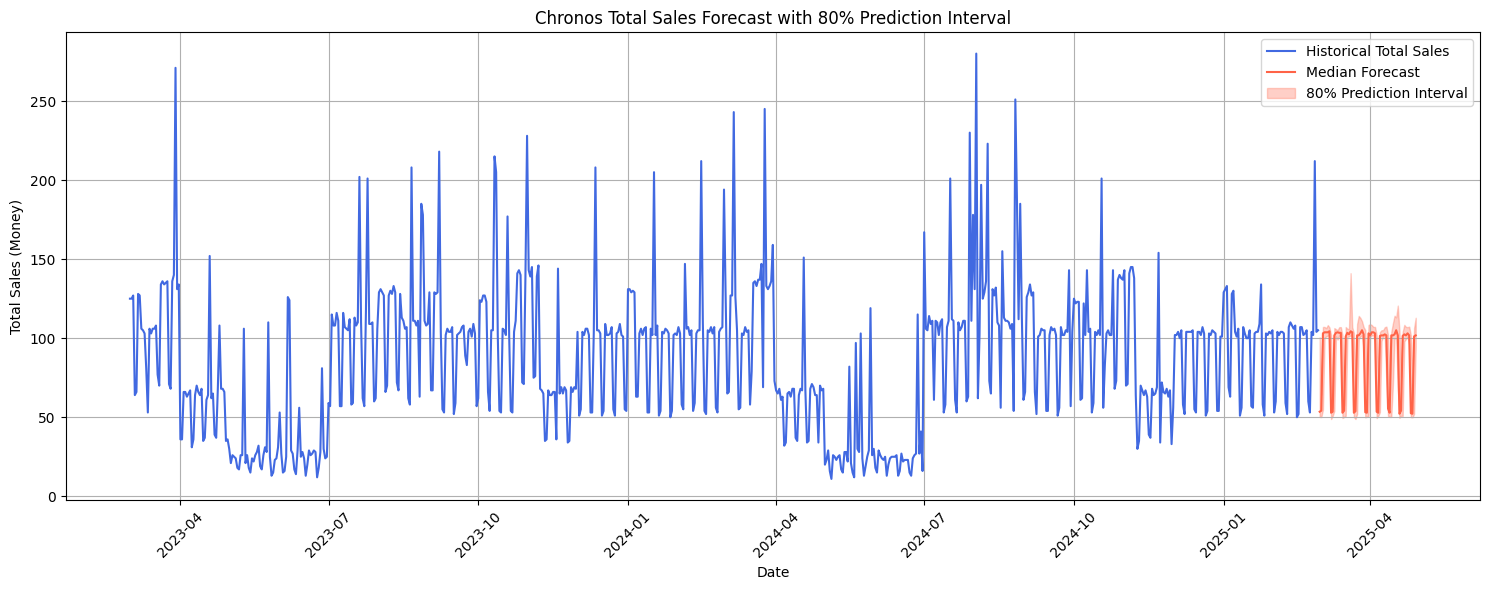

In [16]:
# Visualize the Chronos forecast with prediction interval
plt.figure(figsize=(15, 6))

# Plot historical data (daily_total_sales before split_date)
plt.plot(historical_sales_before_split['date'], historical_sales_before_split['total_cups'], color="royalblue", label="Historical Total Sales")


# Create dates for the forecast period
# The forecast starts immediately after the last date in the historical_sales_before_split
last_date_historical = historical_sales_before_split['date'].iloc[-1]
forecast_dates = pd.date_range(start=last_date_historical + pd.Timedelta(days=1), periods=prediction_length, freq='D')

# Calculate quantiles for the prediction interval
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

# Plot the median forecast
plt.plot(forecast_dates, median, color="tomato", label="Median Forecast")

# Plot the 80% prediction interval
plt.fill_between(forecast_dates, low, high, color="tomato", alpha=0.3, label="80% Prediction Interval")


plt.title('Chronos Total Sales Forecast with 80% Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Total Sales (Money)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
forecast[0][:][0]

tensor([ 58.0591,  52.8403, 103.0712, 101.7665, 105.6806, 103.0712, 105.0283,
         48.9262,  52.1880, 106.9853, 101.7665,  98.5048, 105.0283, 101.1142,
         49.5786,  54.1450, 103.0712, 105.0283, 103.0712, 110.8994, 103.7236,
         54.1450,  56.1021, 103.7236, 101.7665, 103.0712, 108.9424, 103.0712,
         58.7115,  52.8403, 106.9853, 103.7236, 106.9853, 103.7236, 105.6806,
         60.0162,  59.3638, 105.0283, 103.0712, 105.0283, 106.9853, 105.0283,
         60.0162,  61.3209, 114.1612,  67.8443, 152.6498, 153.9545, 155.2592,
         71.7584,  72.4108, 138.9504, 147.4310, 142.2122, 142.8645, 146.7786,
         73.0631,  69.8014, 140.2551, 151.3451])

In [18]:
median_forecast = np.median(forecast[0], axis=0)
print("ค่ามัธยฐานของผลการพยากรณ์ 2 เดือนข้างหน้า")
print(median_forecast)

ค่ามัธยฐานของผลการพยากรณ์ 2 เดือนข้างหน้า
[ 53.49266   54.145008 103.07121  103.723564 103.723564 103.723564
 104.375916  52.84031   53.49266  101.76652  103.397385 103.723564
 103.397385 103.397385  52.84031   54.145008 101.11417  103.397385
 102.41887  104.375916 103.723564  52.84031   53.818832 101.76652
 101.76652  103.07121  105.028275 102.41887   53.166485  52.84031
 103.07121  101.76652  103.723564 103.723564 103.07121   53.49266
  52.84031  101.44034  101.76652  101.76652  102.41887  101.76652
  55.449707  52.84031  101.76652  101.76652  102.41887  105.028275
 101.76652   52.18796   54.145008 101.44034  102.41887  101.76652
 103.07121  101.76652   52.514137  52.18796  101.11417  101.76652 ]
